### Import Modules



In [6]:
import keras
import pandas as pd
import numpy as np
from PySimpleGUI import Input
from keras.src.callbacks.tensorboard import keras_model_summary
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import scipy.stats as stats
import xgboost as xgb
from tensorflow.keras.models import Sequential
from keras import Input
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import numpy as np



### Load the Data

In [7]:
# Load the Excel file
file_path = r'C:\Users\terry\Desktop\Resource Analysis.xlsx'
xls = pd.ExcelFile( file_path )

# Load the first sheet into a DataFrame
df = pd.read_excel( xls, sheet_name = 'Data' )

# Display the first few rows of the DataFrame
print( df.head( 50 ) )

    FiscalYear  BPOA EPOA                      BureauTitle  \
0         2024   NaN  NaN       90-DEPARTMENTAL MANAGEMENT   
1         2024   NaN  NaN       90-DEPARTMENTAL MANAGEMENT   
2         2024   NaN  NaN  10-FOOD AND DRUG ADMINISTRATION   
3         2024   NaN  NaN  10-FOOD AND DRUG ADMINISTRATION   
4         2024   NaN  NaN  10-FOOD AND DRUG ADMINISTRATION   
5         2024   NaN  NaN  10-FOOD AND DRUG ADMINISTRATION   
6         2024   NaN  NaN  10-FOOD AND DRUG ADMINISTRATION   
7         2024   NaN  NaN  10-FOOD AND DRUG ADMINISTRATION   
8         2024   NaN  NaN  10-FOOD AND DRUG ADMINISTRATION   
9         2024   NaN  NaN  10-FOOD AND DRUG ADMINISTRATION   
10        2024   NaN  NaN  10-FOOD AND DRUG ADMINISTRATION   
11        2024   NaN  NaN  10-FOOD AND DRUG ADMINISTRATION   
12        2024   NaN  NaN  10-FOOD AND DRUG ADMINISTRATION   
13        2024   NaN  NaN  10-FOOD AND DRUG ADMINISTRATION   
14        2024   NaN  NaN  10-FOOD AND DRUG ADMINISTRATION   
15      

In [8]:

# Review features
for i in df.columns:
    print( i )

FiscalYear
BPOA
EPOA
BureauTitle
TreasuryAgencyTitle
BudgetAgencyTitle
BudgetAgencyCode
BudgetAgencyName
TreasuryAgencyCode
BudgetBureauCode
BudgetBureauName
AccountCode
SectionName
January-SUM
January-AVE
Feburary-SUM
Feburary-AVE
March-SUM
March-AVE
April-SUM
April-AVE
May-SUM
May-AVE
June-SUM
June-AVE
July-SUM
July-AVE
August-SUM
August-AVE
November-SUM
November-AVE
December-SUM
December-AVE


## Descriptive Statistics


In [25]:
# Descriptive statistics
print( '\nDescriptive Statistics:' )
print( df.describe() )




Descriptive Statistics:
       FiscalYear          BPOA  BudgetAgencyCode  TreasuryAgencyCode  \
count     61932.0  21780.000000      61932.000000        61932.000000   
mean       2024.0   2020.886272         68.097397           45.379804   
std           0.0      3.214205        133.309585           33.178600   
min        2024.0   2005.000000          5.000000           11.000000   
25%        2024.0   2019.000000          7.000000           15.000000   
50%        2024.0   2021.000000         10.000000           21.000000   
75%        2024.0   2023.000000         18.000000           75.000000   
max        2024.0   2099.000000        587.000000           97.000000   

       BudgetBureauCode   January-SUM   January-AVE  Feburary-SUM  \
count      61932.000000  6.193200e+04  6.193200e+04  6.193200e+04   
mean          26.618646  1.498889e+09  9.262740e+08  1.590124e+09   
std           27.448150  3.166622e+10  1.472457e+10  3.323848e+10   
min            0.000000  1.000000e-02  1.

### Histograms

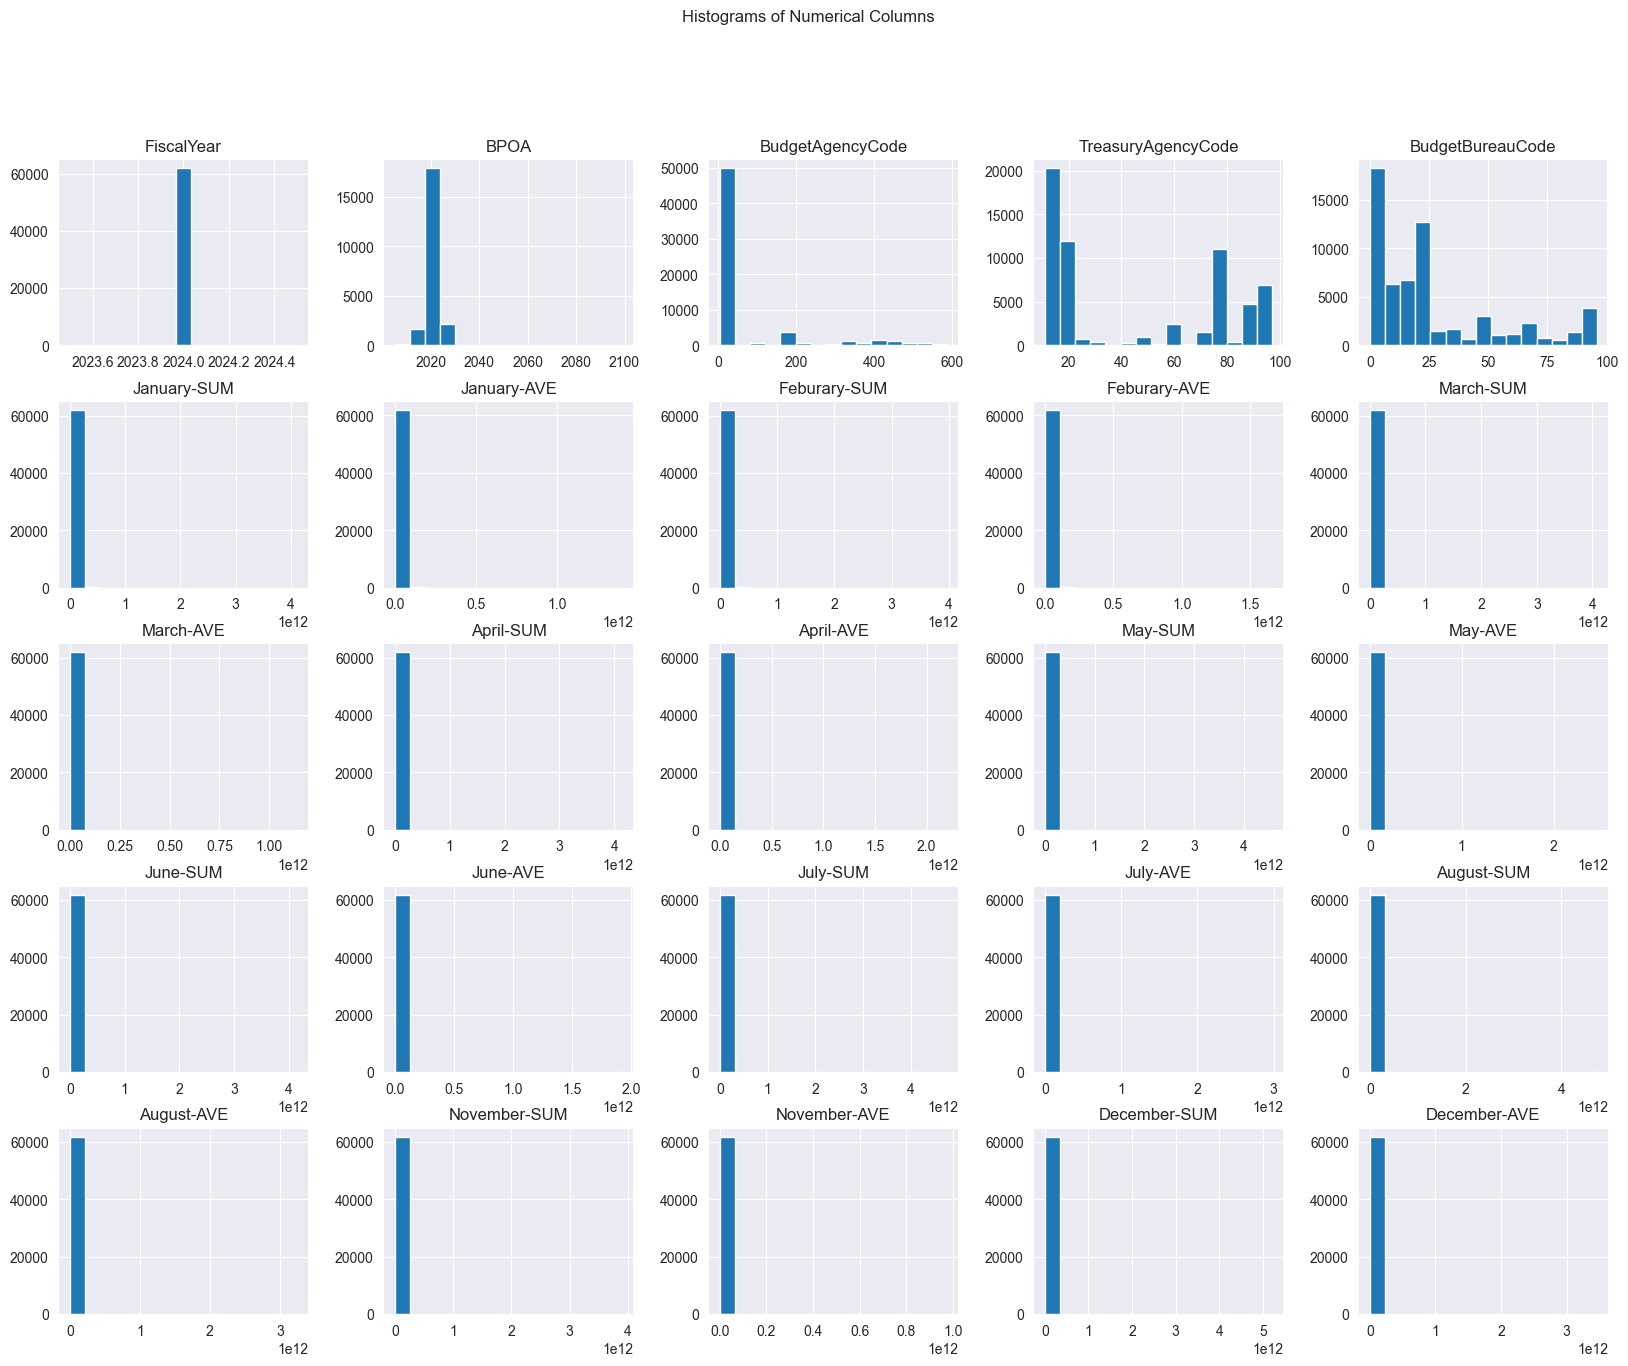

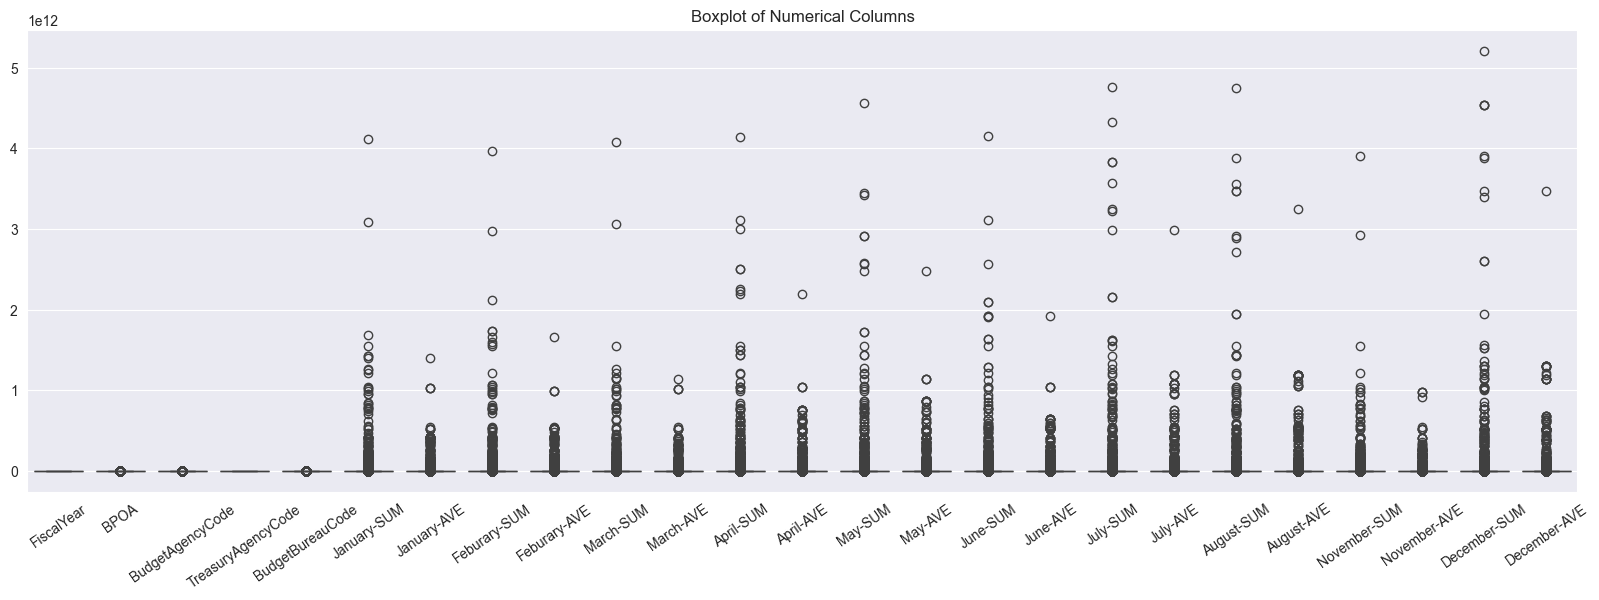

In [30]:
# Histogram for each numerical column
df.hist( bins = 15, figsize = (20, 15), layout = (5, 5) )
plt.suptitle( 'Histograms of Numerical Columns' )
plt.show()

# Boxplot for each numerical column
plt.figure( figsize = (20, 6) )
sns.boxplot( data = df )
plt.title( 'Boxplot of Numerical Columns' )
plt.xticks( rotation = 35 )
plt.show()


### Descriptive Statistics Analysis

In [34]:
# Selecting numerical columns for analysis (Monthly Totals)
numerical_cols = [
        'January-SUM', 'Feburary-SUM', 'March-SUM', 'April-SUM', 'May-SUM', 'June-SUM',
        'July-SUM', 'August-SUM', 'November-SUM', 'December-SUM' ]

# Convert columns to numeric (handling errors due to any non-numeric values)
df[ numerical_cols ] = df[ numerical_cols ].apply( pd.to_numeric, errors = 'coerce' )

# Compute descriptive statistics
descriptive_stats = df[ numerical_cols ].describe().T

# Compute additional statistics: skewness and kurtosis
descriptive_stats[ 'Skewness' ] = df[ numerical_cols ].skew()
descriptive_stats[ 'Kurtosis' ] = df[ numerical_cols ].kurtosis()

# Display results
descriptive_stats


,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis
January-SUM,61932.0,1.498889e+09,3.166622e+10,0.01,7.055335e+05,8.037163e+06,8.478489e+07,4.114977e+12,68.558245,6752.157581
Feburary-SUM,61932.0,1.590124e+09,3.323848e+10,0.01,7.938000e+05,8.691542e+06,9.105143e+07,3.969418e+12,62.212311,5353.929059
March-SUM,61932.0,1.358725e+09,2.958363e+10,0.01,5.932144e+05,7.075020e+06,7.450644e+07,4.083934e+12,75.619320,8249.193689
April-SUM,61932.0,2.029282e+09,4.039577e+10,0.01,9.959659e+05,1.070942e+07,1.142537e+08,4.143926e+12,55.661214,4000.094061
May-SUM,61932.0,2.154728e+09,4.456584e+10,0.01,1.067123e+06,1.137740e+07,1.214142e+08,4.561800e+12,57.516290,4203.854374
June-SUM,61932.0,1.862544e+09,3.767171e+10,0.01,9.048362e+05,9.771679e+06,1.044577e+08,4.152906e+12,57.494929,4415.630004
July-SUM,61932.0,2.405186e+09,5.224520e+10,0.01,1.166368e+06,1.239547e+07,1.300359e+08,4.753606e+12,57.128421,3987.038194
August-SUM,61932.0,2.289838e+09,4.873000e+10,0.01,1.114972e+06,1.186461e+07,1.262934e+08,4.745019e+12,57.728421,4139.590229
November-SUM,61932.0,1.229112e+09,2.717513e+10,0.01,4.655246e+05,5.922856e+06,6.551571e+07,3.901279e+12,81.871605,9529.300869
December-SUM,61932.0,2.515195e+09,5.787234e+10,0.01,1.055511e+06,1.172970e+07,1.271270e+08,5.207607e+12,58.860520,4158.472382


### T-Test


In [32]:
# Perform paired t-tests between different months
t_test_results = {
        'June vs. July': stats.ttest_rel( df[ 'June-SUM' ], df[ 'July-SUM' ], nan_policy = 'omit' ),
        'July vs. August': stats.ttest_rel( df[ 'July-SUM' ], df[ 'August-SUM' ],
            nan_policy = 'omit' ),
        'August vs. November': stats.ttest_rel( df[ 'August-SUM' ], df[ 'November-SUM' ],
            nan_policy = 'omit' ),
        'November vs. December': stats.ttest_rel( df[ 'November-SUM' ], df[ 'December-SUM' ],
            nan_policy = 'omit' )
}

# Create a DataFrame for better visualization
t_test_df = pd.DataFrame( {
        'Comparison': list( t_test_results.keys() ),
        'T-Statistic': [ round( result.statistic, 2 ) for result in t_test_results.values() ],
        'P-Value': [ round( result.pvalue, 2 ) for result in t_test_results.values() ]
} )

# Display the results
t_test_df


,Comparison,T-Statistic,P-Value
0,June vs. July,-7.35,0.0
1,July vs. August,5.76,0.0
2,August vs. November,8.51,0.0
3,November vs. December,-7.46,0.0


### Correlation Analysis

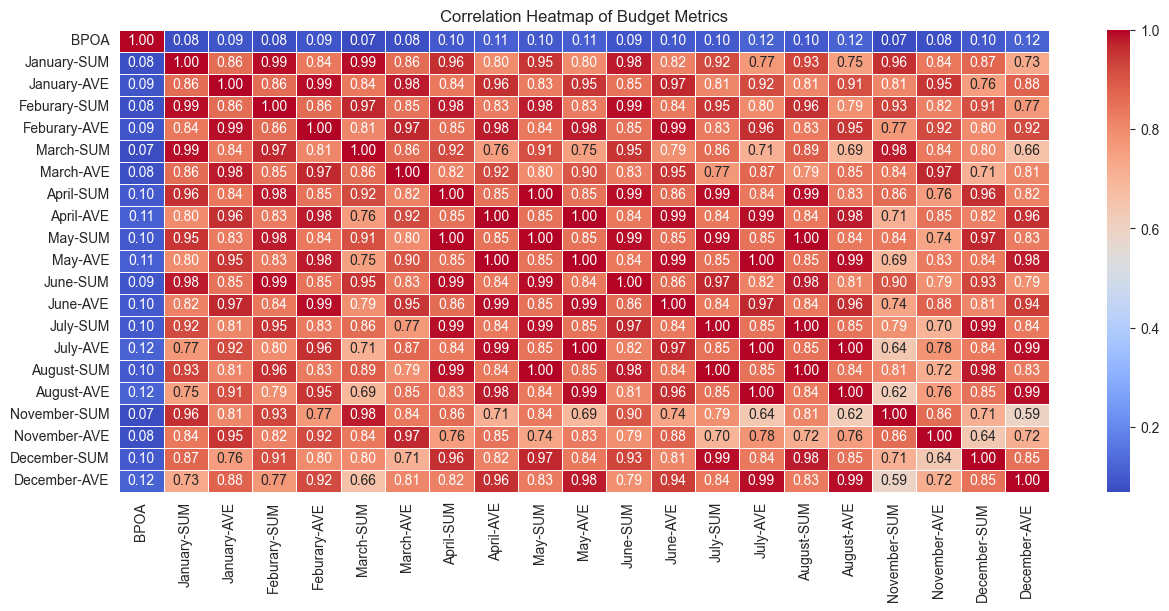

In [33]:
# Select only numeric columns for correlation analysis
df_numeric = df.select_dtypes( include = [ np.float64 ] )

# Compute the correlation matrix and round to 2 decimal places
correlation_matrix = df_numeric.corr().round( 2 )

# Generate a heatmap to visualize correlations
plt.figure( figsize = (15, 6) )
sns.heatmap( correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", linewidths = 0.5 )
plt.title( "Correlation Heatmap of Budget Metrics" )
plt.show()

# Display the correlation matrix as an HTML table (rounded to 2 decimal places)



## Results:
* The heatmap visually highlights the strongest relationships among financial variables.
* Red areas indicate strong positive correlations, while blue areas indicate negative correlations.

### Regression Analysis


In [35]:
# Define independent variables (features) and dependent variable (target)
X = df[ [
        'January-SUM', 'Feburary-SUM', 'April-SUM', 'May-SUM', 'June-SUM', 'July-SUM', 'August-SUM',
        'November-SUM', 'December-SUM'
] ]
y = df[ 'December-SUM' ]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42 )

# Train linear regression model
model = LinearRegression()
model.fit( X_train, y_train )

# Make predictions
y_pred = model.predict( X_test )

# Evaluate the model
mse = mean_squared_error( y_test, y_pred )
r2 = r2_score( y_test, y_pred )

# Display regression results
regression_results = pd.DataFrame( {
        'Metric': [ 'Mean Squared Error', 'R-Squared' ],
        'Value': [ round( mse, 2 ), round( r2, 2 ) ]
} )

regression_results


,Metric,Value
0,Mean Squared Error,0.0
1,R-Squared,1.0


### Regression Model

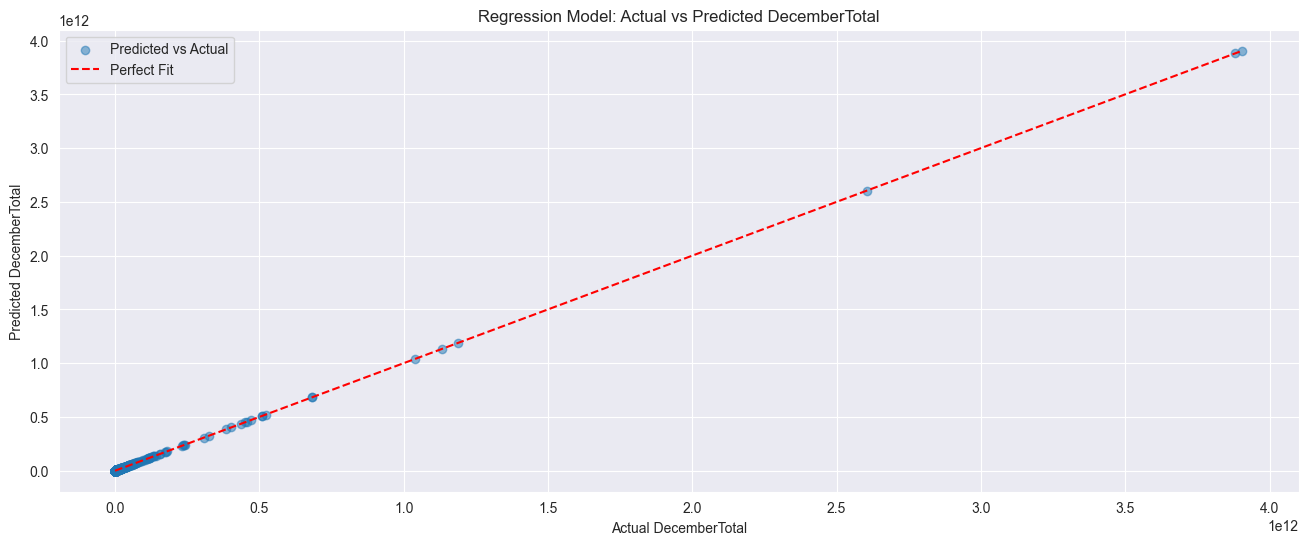

In [38]:
# Scatter plot of actual vs predicted values for DecemberTotal
plt.figure( figsize = (16, 6) )
plt.scatter( y_test, y_pred, alpha = 0.5, label = 'Predicted vs Actual' )
plt.plot( [ y_test.min(), y_test.max() ], [ y_test.min(), y_test.max() ], color = 'red',
    linestyle = 'dashed', label = 'Perfect Fit' )
plt.xlabel( 'Actual DecemberTotal' )
plt.ylabel( 'Predicted DecemberTotal' )
plt.title( 'Regression Model: Actual vs Predicted DecemberTotal' )
plt.legend()
plt.show()


### Correlation Matrix & Heatmap

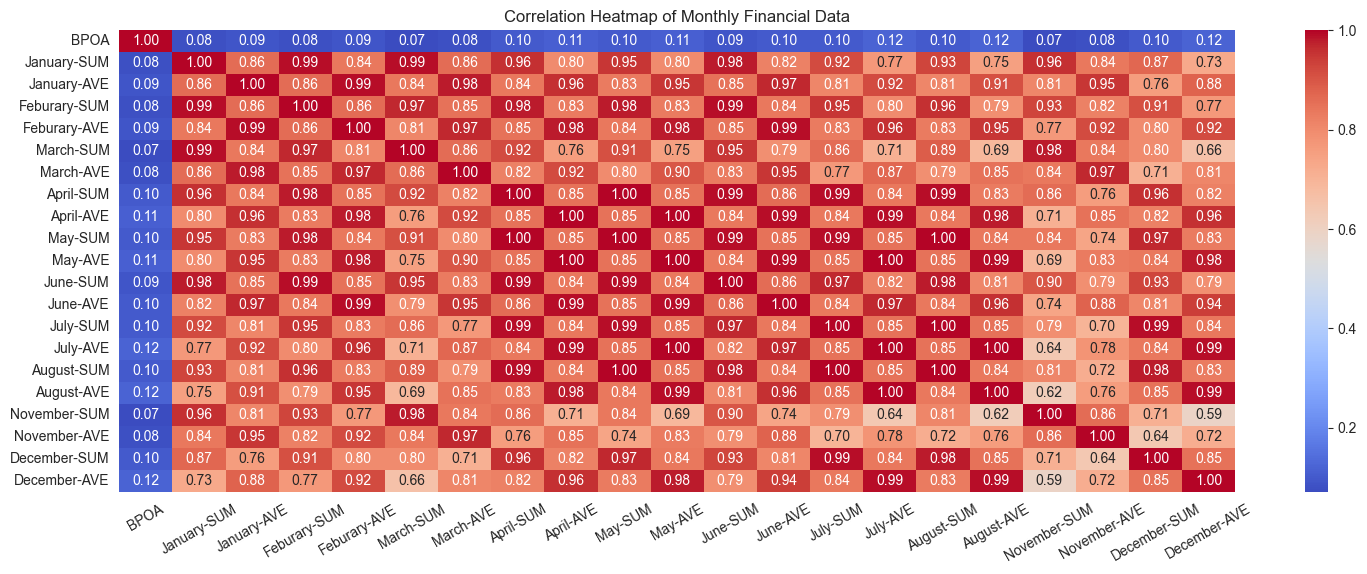

In [40]:
# Heatmap of correlation matrix
plt.figure( figsize = (18, 6) )
sns.heatmap( correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f' )
plt.title( 'Correlation Heatmap of Monthly Financial Data' )
plt.xticks( rotation = 30 )
plt.show()


### Trending Analysis

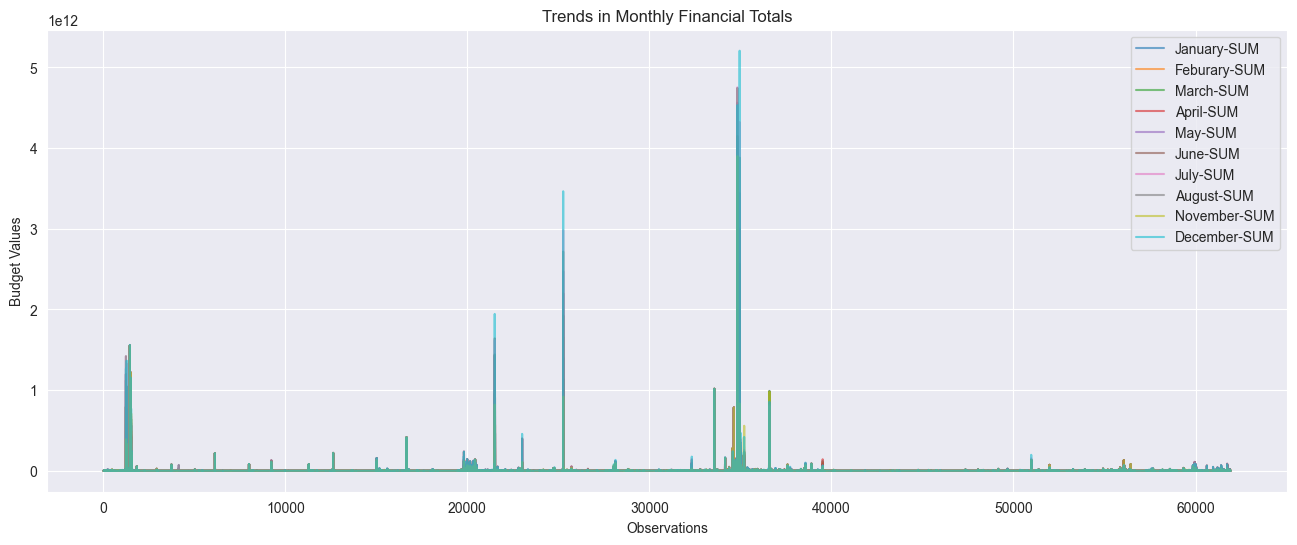

In [53]:

plt.figure( figsize = (16, 6) )
for col in numerical_cols:
    plt.plot( df.index, df[ col ], label = col, alpha = 0.6 )

plt.xlabel( 'Observations' )
plt.ylabel( 'Budget Values' )
plt.title( 'Trends in Monthly Financial Totals' )
plt.legend()
plt.show()


### Feature Engineering & Transformation


In [47]:
# Convert financial columns to numeric
df[ numerical_cols ] = df[ numerical_cols ].apply( pd.to_numeric, errors = 'coerce' )

# Drop rows with missing values (to ensure valid transformations)
df_cleaned = df.dropna( subset = numerical_cols )

# 1. Normalization (Min-Max Scaling)
min_max_scaler = MinMaxScaler()
df_normalized = pd.DataFrame( min_max_scaler.fit_transform( df_cleaned[ numerical_cols ] ),
    columns = numerical_cols )

# 2. Standardization (Z-score scaling)
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame( standard_scaler.fit_transform( df_cleaned[ numerical_cols ] ),
    columns = numerical_cols )

# 3. Log Transformations (Reducing skewness in right-skewed data)
df_log_transformed = df_cleaned[ numerical_cols ].map( lambda x: np.log1p( x ) if x > 0 else 0 )

# 4. Polynomial & Interaction Features
poly = PolynomialFeatures( degree = 2, interaction_only = False, include_bias = False )
poly_features = poly.fit_transform( df_cleaned[ numerical_cols ] )
df_poly = pd.DataFrame( poly_features, columns = poly.get_feature_names_out( numerical_cols ) )

# Display transformed datasets
df_normalized
df_standardized
df_log_transformed
df_poly

,January-SUM,Feburary-SUM,March-SUM,April-SUM,May-SUM,June-SUM,July-SUM,August-SUM,November-SUM,December-SUM,...,July-SUM^2,July-SUM August-SUM,July-SUM November-SUM,July-SUM December-SUM,August-SUM^2,August-SUM November-SUM,August-SUM December-SUM,November-SUM^2,November-SUM December-SUM,December-SUM^2
0,43641.42,43641.42,43641.42,43641.42,43641.42,43641.42,43641.42,43641.42,43641.42,43641.42,...,1.904574e+09,1.904574e+09,1.904574e+09,1.904574e+09,1.904574e+09,1.904574e+09,1.904574e+09,1.904574e+09,1.904574e+09,1.904574e+09
1,72735.70,72735.70,72735.70,72735.70,72735.70,72735.70,72735.70,72735.70,72735.70,72735.70,...,5.290482e+09,5.290482e+09,5.290482e+09,5.290482e+09,5.290482e+09,5.290482e+09,5.290482e+09,5.290482e+09,5.290482e+09,5.290482e+09
2,987829.75,1405150.34,1157670.48,2233528.70,2439401.23,2042889.36,3231706.84,2732474.83,22302.64,5375310.78,...,1.044393e+13,8.830558e+12,7.207559e+10,1.737143e+13,7.466419e+12,6.094140e+10,1.468790e+13,4.974078e+08,1.198836e+11,2.889397e+13
3,1189020.00,34720.00,34720.00,34720.00,34720.00,34720.00,34720.00,34720.00,34720.00,34720.00,...,1.205478e+09,1.205478e+09,1.205478e+09,1.205478e+09,1.205478e+09,1.205478e+09,1.205478e+09,1.205478e+09,1.205478e+09,1.205478e+09
4,1558938.67,1776034.35,706704.74,2458627.73,2249174.40,1974558.98,2513829.02,2289737.71,1361479.62,2658960.20,...,6.319336e+12,5.756009e+12,3.422527e+12,6.684171e+12,5.242899e+12,3.117431e+12,6.088321e+12,1.853627e+12,3.620120e+12,7.070069e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61927,43459.52,43459.52,43459.52,43459.52,43459.52,43459.52,43459.52,43459.52,43459.52,43459.52,...,1.888730e+09,1.888730e+09,1.888730e+09,1.888730e+09,1.888730e+09,1.888730e+09,1.888730e+09,1.888730e+09,1.888730e+09,1.888730e+09
61928,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,...,6.250000e-02,6.250000e-02,6.250000e-02,6.250000e-02,6.250000e-02,6.250000e-02,6.250000e-02,6.250000e-02,6.250000e-02,6.250000e-02
61929,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,...,4.000000e-02,4.000000e-02,4.000000e-02,4.000000e-02,4.000000e-02,4.000000e-02,4.000000e-02,4.000000e-02,4.000000e-02,4.000000e-02
61930,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,2.500000e-03,2.500000e-03,2.500000e-03,2.500000e-03,2.500000e-03,2.500000e-03,2.500000e-03,2.500000e-03,2.500000e-03,2.500000e-03


## Histograms


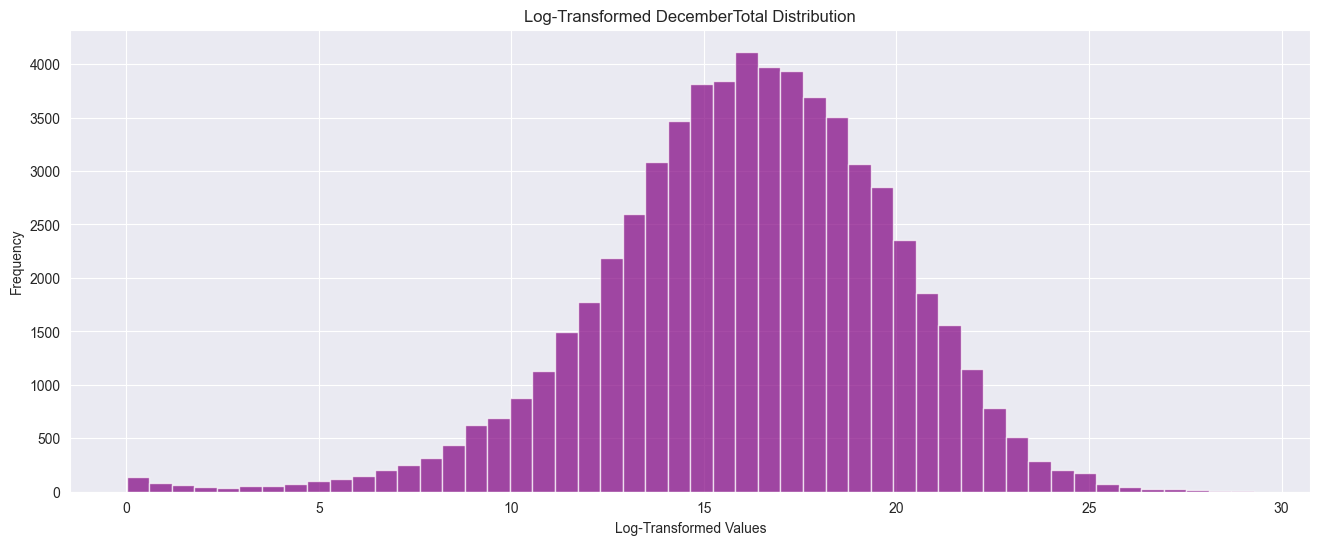

In [52]:
# Histogram of Log-Transformed Data
plt.figure( figsize = (16, 6) )
plt.hist( df_log_transformed[ 'December-SUM' ], bins = 50, alpha = 0.7, color = 'purple' )
plt.title( 'Log-Transformed DecemberTotal Distribution' )
plt.xlabel( 'Log-Transformed Values' )
plt.ylabel( 'Frequency' )
plt.show()


### Scatter Plot

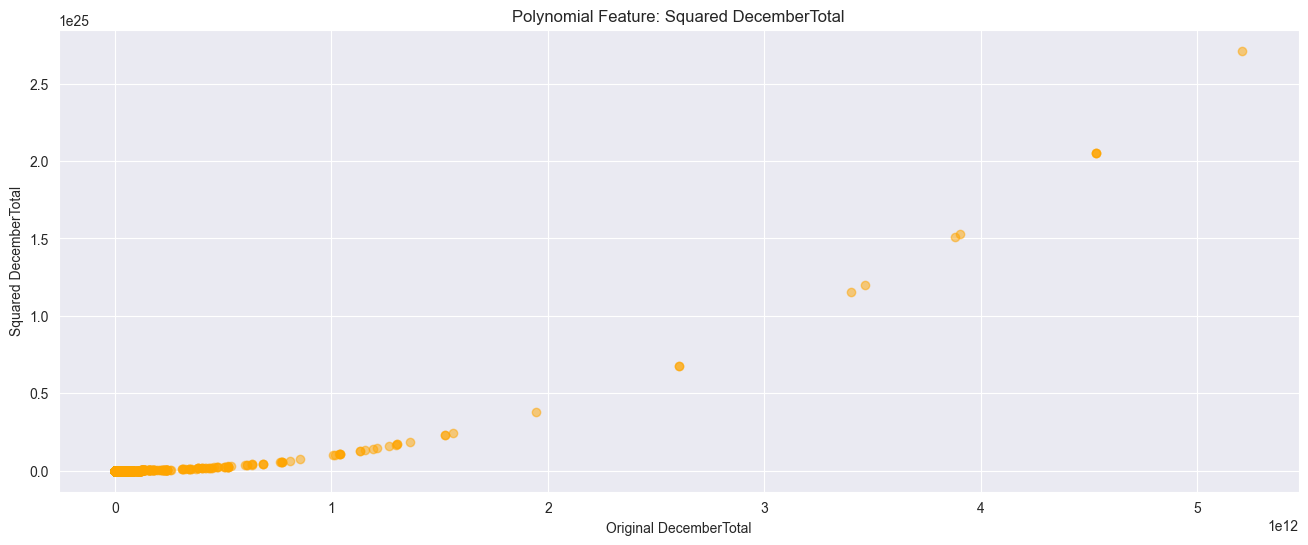

In [51]:
# Scatter plot of Original vs Squared DecemberTotal (Polynomial Feature)
plt.figure( figsize = (16, 6) )
plt.scatter( df_cleaned[ 'December-SUM' ], df_poly[ 'December-SUM^2' ], alpha = 0.5,
    color = 'orange' )
plt.xlabel( 'Original DecemberTotal' )
plt.ylabel( 'Squared DecemberTotal' )
plt.title( 'Polynomial Feature: Squared DecemberTotal' )
plt.show()


In [32]:
# Convert to numeric and handle missing values
df_numeric = df[ numerical_cols ].apply( pd.to_numeric, errors = 'coerce' ).fillna( 0 )

# Normalize the data (Min-Max Scaling: [0,1])
df_normalized = (df_numeric - df_numeric.min()) / (df_numeric.max() - df_numeric.min())

# Add categorical labels (simplified based on Treasury Agency Code)
df_normalized[ 'AgencyCategory' ] = df[ 'TreasuryAgencyCode' ].astype( str )

# Display sample of the normalized data
df_normalized.head()



,January-SUM,Feburary-SUM,March-SUM,April-SUM,May-SUM,June-SUM,July-SUM,August-SUM,November-SUM,December-SUM,AgencyCategory
0,1.060550e-08,1.099441e-08,1.068612e-08,1.053142e-08,9.566708e-09,1.050864e-08,9.180696e-09,9.197310e-09,1.118644e-08,8.380319e-09,28
1,1.767584e-08,1.832402e-08,1.781020e-08,1.755236e-08,1.594451e-08,1.751441e-08,1.530116e-08,1.532885e-08,1.864406e-08,1.396720e-08,28
2,2.400571e-07,3.539941e-07,2.834694e-07,5.389885e-07,5.347453e-07,4.919181e-07,6.798433e-07,5.758617e-07,5.716748e-09,1.032204e-06,75
3,2.889493e-07,8.746872e-09,8.501603e-09,8.378525e-09,7.611028e-09,8.360409e-09,7.303927e-09,7.317145e-09,8.899642e-09,6.667168e-09,75
4,3.788450e-07,4.474294e-07,1.730451e-07,5.933087e-07,4.930453e-07,4.754644e-07,5.288257e-07,4.825561e-07,3.489829e-07,5.105916e-07,75


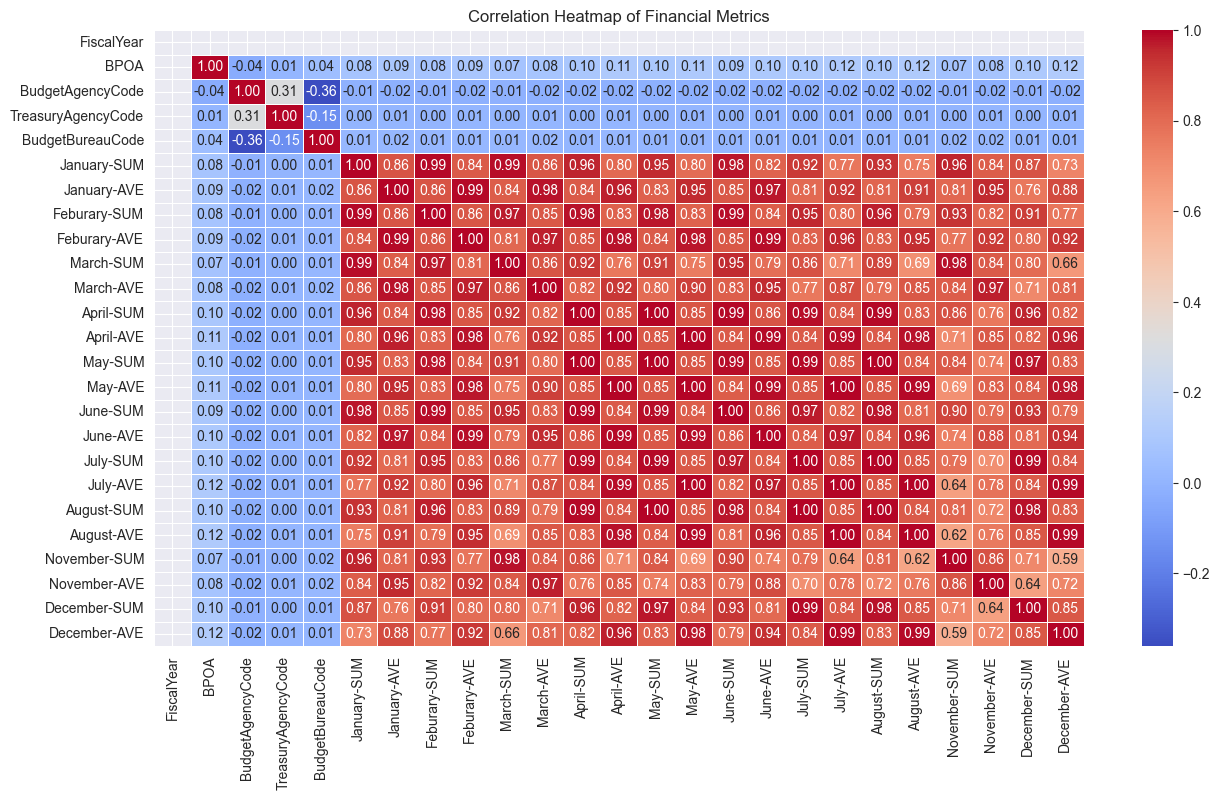

In [65]:
# Select only numeric columns for correlation analysis
df_numeric = df.select_dtypes( include = [ np.number ] )

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Generate a heatmap to visualize correlations
plt.figure( figsize = (15, 8) )
sns.heatmap( correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", linewidths = 0.5 )
plt.title( "Correlation Heatmap of Financial Metrics" )
plt.show()



### Correlation Heatmap:
* Represents the relationships between numerical variables.
* Strong positive correlations (close to 1.0) are shown in red, while strong negative correlations (close to -1.0) are in blue.

### Correlation Matrix (HTML Table):
* A numerical table of correlation coefficients between financial metrics.
#### Key Insights:
* High correlations between monthly financial metrics indicate strong seasonal trends.
* FiscalYear might have a lower correlation with financial values, depending on budget trends over the years.
* Highly correlated variables may cause redundancy in predictive modeling, which can be addressed using feature selection techniques.

In [66]:
# Identify highly correlated features (above 0.85 threshold)
correlation_threshold = 0.85
high_corr_features = set()

# Iterate through the correlation matrix
for i in range( len( correlation_matrix.columns ) ):
    for j in range( i ):
        if abs( correlation_matrix.iloc[ i, j ] ) > correlation_threshold:
            colname = correlation_matrix.columns[ i ]
            high_corr_features.add( colname )

# Display selected features for removal (redundant features)
high_corr_features


{'April-AVE',
 'April-SUM',
 'August-AVE',
 'August-SUM',
 'December-AVE',
 'December-SUM',
 'Feburary-AVE',
 'Feburary-SUM',
 'January-AVE',
 'July-AVE',
 'July-SUM',
 'June-AVE',
 'June-SUM',
 'March-AVE',
 'March-SUM',
 'May-AVE',
 'May-SUM',
 'November-AVE',
 'November-SUM'}

## Feature Selection Results:
* Based on a correlation threshold of 0.85, the following features are highly correlated and can be considered for removal to reduce redundancy:

#### Monthly SUM & AVE Metrics:
* January-SUM, January-AVE, February-SUM, February-AVE, March-SUM, March-AVE, etc.
* These variables are highly correlated, meaning some can be removed to simplify the model.

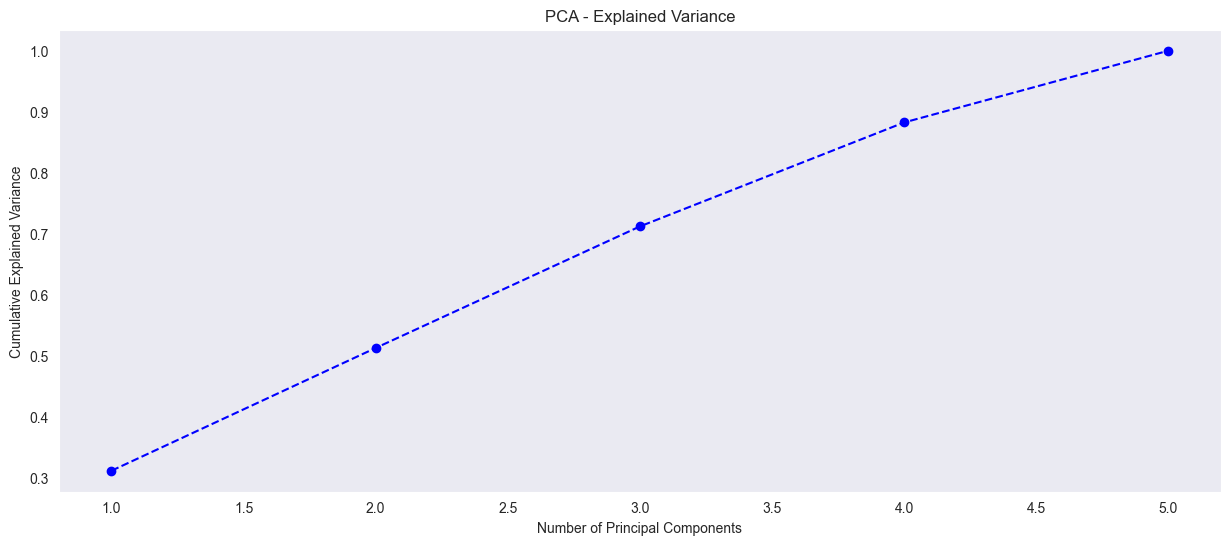

In [71]:
# Impute missing values with column means
df_imputed = df_selected.fillna( df_selected.mean() )

# Standardizing the data
df_scaled = scaler.fit_transform( df_imputed )

# Applying PCA again after handling missing values
pca = PCA( n_components = 5 )  # Keeping 5 principal components
principal_components = pca.fit_transform( df_scaled )

# Creating a DataFrame for PCA results
pca_df = pd.DataFrame( principal_components, columns = [ f"PC{i + 1}" for i in range( 5 ) ] )

# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_

# Display Explained Variance per Principal Component
explained_variance_df = pd.DataFrame( {
        "Principal Component": [ f"PC{i + 1}" for i in range( len( explained_variance ) ) ],
        "Explained Variance Ratio": explained_variance
} )

# Plot the explained variance
plt.figure( figsize = (15, 6) )
plt.plot( range( 1, 6 ), np.cumsum( explained_variance ), marker = 'o', linestyle = '--',
    color = 'b' )
plt.xlabel( "Number of Principal Components" )
plt.ylabel( "Cumulative Explained Variance" )
plt.title( "PCA - Explained Variance" )
plt.grid()
plt.show()



### Principal Component Analysis (PCA) Results
* Missing Values Handled:
* Missing values were imputed with the mean to ensure PCA could process the data.

#### Explained Variance Table (Displayed Above):
* Shows how much variance each Principal Component (PC) captures.

#### Explained Variance Plot:
* The cumulative variance plot helps determine how many components are needed to retain most of the information.
* If the curve levels off quickly, fewer components are required.

#### Key Takeaways:
* The first few principal components explain a significant portion of the variance.
* This suggests that we can reduce dimensionality while retaining key patterns in the data.

In [4]:
# Select only numeric columns for correlation analysis
df_numeric = df.select_dtypes( include = [ np.float64 ] )

# Compute the correlation matrix and round to 2 decimal places
correlation_matrix = df_numeric.corr().round( 2 )

# Generate a heatmap to visualize correlations
plt.figure( figsize = (12, 8) )
sns.heatmap( correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", linewidths = 0.5 )
plt.title( "Correlation Heatmap of Financial Metrics" )
plt.show()

# Display the correlation matrix as an HTML table (rounded to 2 decimal places)
import IPython.core.display as display

display.display( correlation_matrix.to_html( index = True, float_format = "%.2f" ) )

# Identify the top correlated features with December-SUM (excluding itself)
top_correlated_features = correlation_matrix[ "December-SUM" ].abs().sort_values(
    ascending = False )[ 1:6 ]

# Convert to DataFrame for better visualization and round to 2 decimal places
top_correlated_df = pd.DataFrame( top_correlated_features ).reset_index()
top_correlated_df.columns = [ "Feature", "Correlation with December-SUM" ]

# Display as an HTML table (rounded to 2 decimal places)
display( top_correlated_df.to_html( index = False, float_format = "%.2f" ) )

# Scatter plot of top correlated features with December-SUM
plt.figure( figsize = (12, 8) )

# Iterate through the top correlated features and plot scatter plots
for feature in top_correlated_features.index:
    plt.scatter( df_numeric[ feature ], df_numeric[ "December-SUM" ], alpha = 0.5, label = feature )

plt.xlabel( "Feature Values" )
plt.ylabel( "December-SUM" )
plt.title( "Scatter Plot: Top Correlated Features vs. December-SUM" )
plt.legend()
plt.grid()
plt.show()

NameError: name 'df' is not defined

### Key Feature Correlation Analysis (top 5)
-- most correlated features with December-SUM are:
* July-SUM      0.99
* August-SUM	0.98
* May-SUM	    0.97
* April-SUM	    0.96
* June-SUM	    0.93
